<a href="https://colab.research.google.com/github/MSHDZ1/Q_late-night/blob/main/V3_Assignment3_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
# feel free to add more if you need

In [2]:
pd.set_option('display.max_columns', 50)

# load data
data_raw = pd.read_csv('/content/DataCoSupplyChainDataset.csv', encoding = "ISO-8859-1")

# load data description
data_description = pd.read_csv('/content/DescriptionDataCoSupplyChain.csv', encoding = "ISO-8859-1")

Learning the Variables

Are all the features going to be helpful for our prediction task? In other words, do you expect any correlation or dependencies between the response variables and custormers' information (i.e. Custormer ID, Custormer Email, etc.)?
<br>
If not, then we may consider remove some of the redundant variables (categorical and continuous).

In [3]:
data_raw.select_dtypes(include = ["object"]).columns

Index(['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Department Name', 'Market',
       'Order City', 'Order Country', 'order date (DateOrders)',
       'Order Region', 'Order State', 'Order Status', 'Product Image',
       'Product Name', 'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='object')

In [4]:
data_raw.select_dtypes(include = ["object"])

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Department Name,Market,Order City,Order Country,order date (DateOrders),Order Region,Order State,Order Status,Product Image,Product Name,shipping date (DateOrders),Shipping Mode
0,DEBIT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,Fitness,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,Southeast Asia,Java Occidental,COMPLETE,http://images.acmesports.sports/Smart+watch,Smart watch,2/3/2018 22:56,Standard Class
1,TRANSFER,Late delivery,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:27,South Asia,Rajastán,PENDING,http://images.acmesports.sports/Smart+watch,Smart watch,1/18/2018 12:27,Standard Class
2,CASH,Shipping on time,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:06,South Asia,Rajastán,CLOSED,http://images.acmesports.sports/Smart+watch,Smart watch,1/17/2018 12:06,Standard Class
3,DEBIT,Advance shipping,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,Fitness,Pacific Asia,Townsville,Australia,1/13/2018 11:45,Oceania,Queensland,COMPLETE,http://images.acmesports.sports/Smart+watch,Smart watch,1/16/2018 11:45,Standard Class
4,PAYMENT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,Fitness,Pacific Asia,Townsville,Australia,1/13/2018 11:24,Oceania,Queensland,PENDING_PAYMENT,http://images.acmesports.sports/Smart+watch,Smart watch,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130586,DEBIT,Advance shipping,Women's Apparel,Sylmar,EE. UU.,XXXXXXXXX,Mary,Kidd,XXXXXXXXX,Consumer,CA,4733 Cozy Fox Acres,Golf,USCA,New York City,Estados Unidos,4/7/2016 0:45,East of USA,Nueva York,COMPLETE,http://images.acmesports.sports/Nike+Men%27s+D...,Nike Men's Dri-FIT Victory Golf Polo,4/10/2016 0:45,Standard Class
130587,DEBIT,Shipping on time,Women's Apparel,Saint Charles,EE. UU.,XXXXXXXXX,Mary,Bryant,XXXXXXXXX,Consumer,MO,3710 Little Nook,Golf,USCA,Richmond,Estados Unidos,6/8/2016 16:05,South of USA,Virginia,COMPLETE,http://images.acmesports.sports/Nike+Men%27s+D...,Nike Men's Dri-FIT Victory Golf Polo,6/12/2016 16:05,Standard Class
130588,DEBIT,Advance shipping,Shop By Sport,Detroit,EE. UU.,XXXXXXXXX,Olivia,Bradford,XXXXXXXXX,Consumer,MI,7983 Iron Grounds,Golf,USCA,Wilmington,Estados Unidos,8/8/2016 12:19,East of USA,Delaware,COMPLETE,http://images.acmesports.sports/Under+Armour+G...,Under Armour Girls' Toddler Spine Surge Runni,8/10/2016 12:19,Standard Class
130589,DEBIT,Advance shipping,Shop By Sport,New York,EE. UU.,XXXXXXXXX,Amy,Smith,XXXXXXXXX,Consumer,NY,6502 Red Point,Golf,USCA,Philadelphia,Estados Unidos,7/19/2016 3:35,East of USA,Pensilvania,COMPLETE,http://images.acmesports.sports/Under+Armour+G...,Under Armour Girls' Toddler Spine Surge Runni,7/21/2016 3:35,Standard Class


In [5]:
# removing redundant categorical features for modeling
remove_cat = ['Category Name', 'Customer City',
               'Customer Country', 'Customer Email',
               'Customer Fname', 'Customer Lname',
               'Customer Password', 'Customer State',
               'Customer Street', 'Department Name',
               'Market', 'Order City', 'Order Country',
               'Order Region', 'Order State', 'Product Image',
               'Product Name']

In [6]:
data_raw.select_dtypes(exclude = ["object"]).columns

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Late_delivery_risk',
       'Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id',
       'Latitude', 'Longitude', 'Order Customer Id', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Zipcode',
       'Product Card Id', 'Product Category Id', 'Product Description',
       'Product Price', 'Product Status'],
      dtype='object')

In [7]:
data_raw.select_dtypes(exclude = ["object"])

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
0,3,4,91.250000,314.640015,0.0,73.0,20755.0,725.0,2.0,18.251453,-66.037056,20755.0,77202.0,1360.0,13.110000,0.04,180517.0,327.750000,0.29,1.0,327.750000,314.640015,91.250000,NaN,1360.0,73.0,NaN,327.750000,0.0
1,5,4,-249.089996,311.359985,1.0,73.0,19492.0,725.0,2.0,18.279451,-66.037064,19492.0,75939.0,1360.0,16.389999,0.05,179254.0,327.750000,-0.80,1.0,327.750000,311.359985,-249.089996,NaN,1360.0,73.0,NaN,327.750000,0.0
2,4,4,-247.779999,309.720001,0.0,73.0,19491.0,95125.0,2.0,37.292233,-121.881279,19491.0,75938.0,1360.0,18.030001,0.06,179253.0,327.750000,-0.80,1.0,327.750000,309.720001,-247.779999,NaN,1360.0,73.0,NaN,327.750000,0.0
3,3,4,22.860001,304.809998,0.0,73.0,19490.0,90027.0,2.0,34.125946,-118.291016,19490.0,75937.0,1360.0,22.940001,0.07,179252.0,327.750000,0.08,1.0,327.750000,304.809998,22.860001,NaN,1360.0,73.0,NaN,327.750000,0.0
4,2,4,134.210007,298.250000,0.0,73.0,19489.0,725.0,2.0,18.253769,-66.037048,19489.0,75936.0,1360.0,29.500000,0.09,179251.0,327.750000,0.45,1.0,327.750000,298.250000,134.210007,NaN,1360.0,73.0,NaN,327.750000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130586,3,4,93.099998,190.000000,0.0,24.0,840.0,91342.0,5.0,35.337406,-119.032013,840.0,31652.0,502.0,10.000000,0.05,79095.0,50.000000,0.49,4.0,200.000000,190.000000,93.099998,10035.0,502.0,24.0,NaN,50.000000,0.0
130587,4,4,21.360001,189.000000,0.0,24.0,2210.0,63301.0,5.0,38.778381,-90.507774,2210.0,35943.0,502.0,11.000000,0.06,89766.0,50.000000,0.11,4.0,200.000000,189.000000,21.360001,23223.0,502.0,24.0,NaN,50.000000,0.0
130588,2,4,69.919998,148.759995,0.0,29.0,6177.0,48238.0,5.0,42.391102,-83.131218,6177.0,40111.0,627.0,11.200000,0.07,100083.0,39.990002,0.47,4.0,159.960007,148.759995,69.919998,19805.0,627.0,29.0,NaN,39.990002,0.0
130589,2,4,50.279999,148.759995,0.0,29.0,3855.0,10023.0,5.0,40.775879,-73.981659,3855.0,38716.0,627.0,11.200000,0.07,96659.0,39.990002,0.34,4.0,159.960007,148.759995,50.279999,19134.0,627.0,29.0,NaN,39.990002,0.0


In [8]:
# removing redundant continuous features for modeling
remove_cts = ['Category Id', 'Customer Id', 'Customer Zipcode',
               'Department Id', 'Customer Id', 'Order Id',
               'Order Item Cardprod Id', 'Order Item Id',
               'Order Zipcode', 'Product Card Id', 'Product Category Id',
               'Product Description', 'Product Status', 'Latitude', 'Longitude',
               'Order Customer Id']

Now, let's do a brief EDA and prepare our data for modeling

Check for missing values

In [9]:
data_raw.isna().sum()

,0
Type,0
Days for shipping (real),0
Days for shipment (scheduled),0
Benefit per order,0
Sales per customer,0
Delivery Status,1
Late_delivery_risk,1
Category Id,1
Category Name,1
Customer City,1


Check for duplicate observations

In [10]:
data_raw.duplicated().any()

False

Remove redundant categorical and continuous features for modeling

In [11]:
remove_list = remove_cat + remove_cts
data_raw.drop(remove_list, axis=1, inplace=True)

# check the dimension of the data
data_raw.shape

(130591, 21)

Check for missing values after removing redundent features

In [12]:
data_raw.isna().sum()

,0
Type,0
Days for shipping (real),0
Days for shipment (scheduled),0
Benefit per order,0
Sales per customer,0
Delivery Status,1
Late_delivery_risk,1
Customer Segment,1
order date (DateOrders),1
Order Item Discount,1


Plot a correlation heatmap

<Axes: >

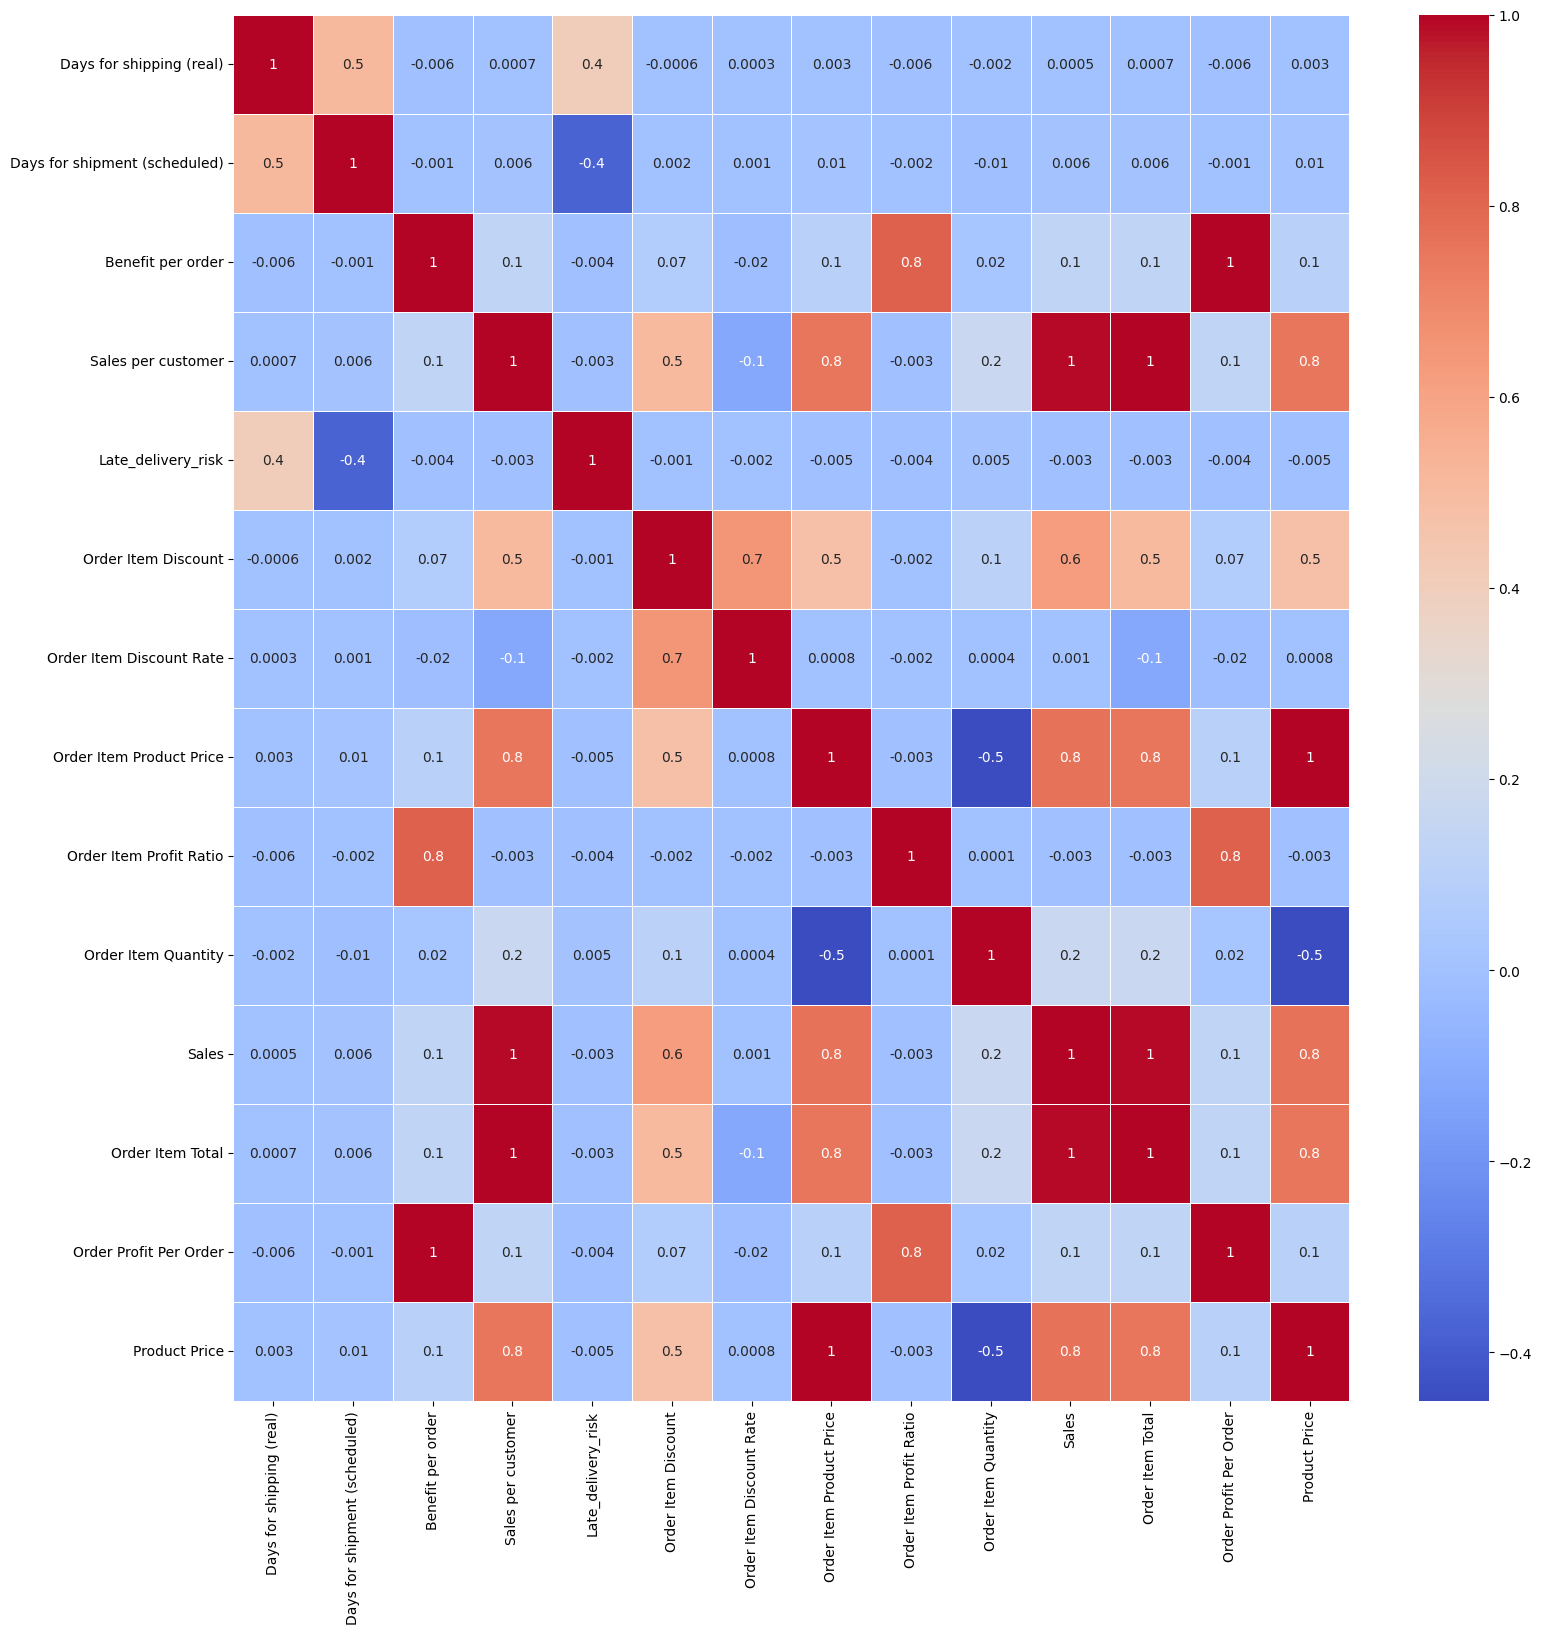

In [13]:
fig, ax = plt.subplots(figsize = (18, 18))
sns.heatmap(data_raw.select_dtypes(exclude=['object']).corr(), annot = True, linewidths = 0.5, fmt = '.1g', cmap = 'coolwarm')

Encodings

In [14]:
# one-hot encoding for categorical variables
ohe_data = pd.get_dummies(data_raw, columns = ['Type', 'Shipping Mode'])
ohe_data[['Type_CASH', 'Type_DEBIT', 'Type_PAYMENT', 'Type_TRANSFER', 'Shipping Mode_First Class', 'Shipping Mode_Same Day', 'Shipping Mode_Second Class', 'Shipping Mode_Standard Class']] = ohe_data[['Type_CASH', 'Type_DEBIT', 'Type_PAYMENT', 'Type_TRANSFER', 'Shipping Mode_First Class', 'Shipping Mode_Same Day', 'Shipping Mode_Second Class', 'Shipping Mode_Standard Class']].astype(int)
ohe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130591 entries, 0 to 130590
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Days for shipping (real)       130591 non-null  int64  
 1   Days for shipment (scheduled)  130591 non-null  int64  
 2   Benefit per order              130591 non-null  float64
 3   Sales per customer             130591 non-null  float64
 4   Delivery Status                130590 non-null  object 
 5   Late_delivery_risk             130590 non-null  float64
 6   Customer Segment               130590 non-null  object 
 7   order date (DateOrders)        130590 non-null  object 
 8   Order Item Discount            130590 non-null  float64
 9   Order Item Discount Rate       130590 non-null  float64
 10  Order Item Product Price       130590 non-null  float64
 11  Order Item Profit Ratio        130590 non-null  float64
 12  Order Item Quantity           

Detect / Remove / Replace Outliers (if any)

In [15]:
# melt data frame into long format
data_melted = pd.melt(ohe_data.select_dtypes(include = ["float"]))
# view first 10 rows of melted data frame
data_melted.head(10)

,variable,value
0,Benefit per order,91.250000
1,Benefit per order,-249.089996
2,Benefit per order,-247.779999
3,Benefit per order,22.860001
4,Benefit per order,134.210007
5,Benefit per order,18.580000
6,Benefit per order,95.180000
7,Benefit per order,68.430000
8,Benefit per order,133.720001
9,Benefit per order,132.149994


<Axes: xlabel='value', ylabel='variable'>

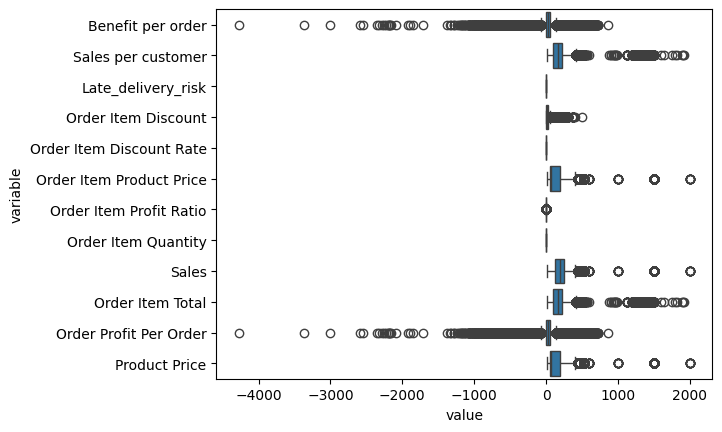

In [16]:
sns.boxplot(y='variable', x='value', data = data_melted)

In [17]:
# Z-score
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

for i in ohe_data.select_dtypes(include=["float"]).columns:
    outliers = []
    sample_outliers = detect_outliers_zscore(ohe_data[i])
    print("Outliers length in '", i, "' from Z-scores method: ", len(sample_outliers))
    print("10 Outliers Sample in '", i, "' from Z-scores method: ", sample_outliers[:10])
    print('\n')

Outliers length in ' Benefit per order ' from Z-scores method:  2680
10 Outliers Sample in ' Benefit per order ' from Z-scores method:  [-425.5799866, -285.0700073, -783.6699829, 595.3499756, 415.7999878, -284.5299988, -459.0, -447.0499878, -459.6700134, -540.789978]


Outliers length in ' Sales per customer ' from Z-scores method:  431
10 Outliers Sample in ' Sales per customer ' from Z-scores method:  [1417.5, 1395.0, 1365.0, 1200.0, 989.9899902, 1230.0, 1275.0, 1245.0, 1125.0, 532.5800171]


Outliers length in ' Late_delivery_risk ' from Z-scores method:  0
10 Outliers Sample in ' Late_delivery_risk ' from Z-scores method:  []


Outliers length in ' Order Item Discount ' from Z-scores method:  1379
10 Outliers Sample in ' Order Item Discount ' from Z-scores method:  [112.4899979, 105.0, 135.0, 300.0, 113.0100021, 124.9899979, 84.98999786, 99.98999786, 84.98999786, 89.98999786]


Outliers length in ' Order Item Discount Rate ' from Z-scores method:  0
10 Outliers Sample in ' Order It

In [18]:
# IQR
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

for i in ohe_data.select_dtypes(include=["float"]).columns:
    outliers = []
    sample_outliers = detect_outliers_iqr(ohe_data[i])
    print("Outliers length in '", i, "' from IQR method: ", len(sample_outliers))
    print("10 Outliers Sample in '", i, "' from IQR method: ", sample_outliers[:10])
    print('\n')

Outliers length in ' Benefit per order ' from IQR method:  13192
10 Outliers Sample in ' Benefit per order ' from IQR method:  [-4274.97998, -3366.0, -3000.0, -2592.0, -2550.0, -2351.25, -2328.0, -2280.0, -2255.25, -2232.0]


Outliers length in ' Sales per customer ' from IQR method:  2796
10 Outliers Sample in ' Sales per customer ' from IQR method:  [414.9599915, 414.9599915, 414.9599915, 414.9599915, 414.9599915, 414.9599915, 414.9599915, 414.9599915, 414.9599915, 414.9599915]


Outliers length in ' Late_delivery_risk ' from IQR method:  0
10 Outliers Sample in ' Late_delivery_risk ' from IQR method:  []


Outliers length in ' Order Item Discount ' from IQR method:  0
10 Outliers Sample in ' Order Item Discount ' from IQR method:  []


Outliers length in ' Order Item Discount Rate ' from IQR method:  0
10 Outliers Sample in ' Order Item Discount Rate ' from IQR method:  []


Outliers length in ' Order Item Product Price ' from IQR method:  0
10 Outliers Sample in ' Order Item Produc

In [19]:
# Removing outliers from z-score method and replacing the removed with median
for i in ohe_data.select_dtypes(include=["float"]).columns:
    outliers = []
    median = np.median(ohe_data[i])
    sample_outliers = detect_outliers_zscore(ohe_data[i])
    print("Outliers length in '", i, "' from Z-scores method: ", len(sample_outliers))
    for j in sample_outliers:
        ohe_data.loc[ohe_data[i] == j, i] = median
    print('Outliers have been removed and replaced with median')

Outliers length in ' Benefit per order ' from Z-scores method:  2680
Outliers have been removed and replaced with median
Outliers length in ' Sales per customer ' from Z-scores method:  431
Outliers have been removed and replaced with median
Outliers length in ' Late_delivery_risk ' from Z-scores method:  0
Outliers have been removed and replaced with median
Outliers length in ' Order Item Discount ' from Z-scores method:  1379
Outliers have been removed and replaced with median
Outliers length in ' Order Item Discount Rate ' from Z-scores method:  0
Outliers have been removed and replaced with median
Outliers length in ' Order Item Product Price ' from Z-scores method:  753
Outliers have been removed and replaced with median
Outliers length in ' Order Item Profit Ratio ' from Z-scores method:  4322
Outliers have been removed and replaced with median
Outliers length in ' Order Item Quantity ' from Z-scores method:  0
Outliers have been removed and replaced with median
Outliers length i

In [20]:
ohe_data

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Customer Segment,order date (DateOrders),Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Status,Product Price,shipping date (DateOrders),Type_CASH,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Shipping Mode_First Class,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
0,3,4,91.250000,314.640015,Advance shipping,0.0,Consumer,1/31/2018 22:56,13.110000,0.04,327.750000,0.29,1.0,327.750000,314.640015,91.250000,COMPLETE,327.750000,2/3/2018 22:56,0,1,0,0,0,0,0,1
1,5,4,-249.089996,311.359985,Late delivery,1.0,Consumer,1/13/2018 12:27,16.389999,0.05,327.750000,-0.80,1.0,327.750000,311.359985,-249.089996,PENDING,327.750000,1/18/2018 12:27,0,0,0,1,0,0,0,1
2,4,4,-247.779999,309.720001,Shipping on time,0.0,Consumer,1/13/2018 12:06,18.030001,0.06,327.750000,-0.80,1.0,327.750000,309.720001,-247.779999,CLOSED,327.750000,1/17/2018 12:06,1,0,0,0,0,0,0,1
3,3,4,22.860001,304.809998,Advance shipping,0.0,Home Office,1/13/2018 11:45,22.940001,0.07,327.750000,0.08,1.0,327.750000,304.809998,22.860001,COMPLETE,327.750000,1/16/2018 11:45,0,1,0,0,0,0,0,1
4,2,4,134.210007,298.250000,Advance shipping,0.0,Corporate,1/13/2018 11:24,29.500000,0.09,327.750000,0.45,1.0,327.750000,298.250000,134.210007,PENDING_PAYMENT,327.750000,1/15/2018 11:24,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130586,3,4,93.099998,190.000000,Advance shipping,0.0,Consumer,4/7/2016 0:45,10.000000,0.05,50.000000,0.49,4.0,200.000000,190.000000,93.099998,COMPLETE,50.000000,4/10/2016 0:45,0,1,0,0,0,0,0,1
130587,4,4,21.360001,189.000000,Shipping on time,0.0,Consumer,6/8/2016 16:05,11.000000,0.06,50.000000,0.11,4.0,200.000000,189.000000,21.360001,COMPLETE,50.000000,6/12/2016 16:05,0,1,0,0,0,0,0,1
130588,2,4,69.919998,148.759995,Advance shipping,0.0,Consumer,8/8/2016 12:19,11.200000,0.07,39.990002,0.47,4.0,159.960007,148.759995,69.919998,COMPLETE,39.990002,8/10/2016 12:19,0,1,0,0,0,0,0,1
130589,2,4,50.279999,148.759995,Advance shipping,0.0,Consumer,7/19/2016 3:35,11.200000,0.07,39.990002,0.34,4.0,159.960007,148.759995,50.279999,COMPLETE,39.990002,7/21/2016 3:35,0,1,0,0,0,0,0,1


In [21]:
# Convert date columns to datetime
ohe_data['order date (DateOrders)'] = pd.to_datetime(ohe_data['order date (DateOrders)'])
ohe_data['shipping date (DateOrders)'] = pd.to_datetime(ohe_data['shipping date (DateOrders)'])

# Engineered Feature 1: Average Customer Order Value
ohe_data['Average_Order_Value'] = ohe_data['Sales per customer'] / ohe_data.groupby('Customer Segment')['Order Item Quantity'].transform('count')

# Engineered Feature 2: Discount Impact (Discount Rate * Order Item Quantity)
ohe_data['Discount_Impact'] = ohe_data['Order Item Discount Rate'] * ohe_data['Order Item Quantity']

# Engineered Feature 3: Average Sales per Customer Segment
ohe_data['Avg_Sales_Segment'] = ohe_data.groupby('Customer Segment')['Sales'].transform('mean')

# Engineered Feature 4: Order Value per Quantity
ohe_data['Order_Value_per_Quantity'] = ohe_data['Sales'] / ohe_data['Order Item Quantity']

# Engineered Feature 6: Order Value to Quantity Ratio
ohe_data['Order_Value_to_Quantity_Ratio'] = ohe_data['Order Item Total'] / ohe_data['Order Item Quantity']

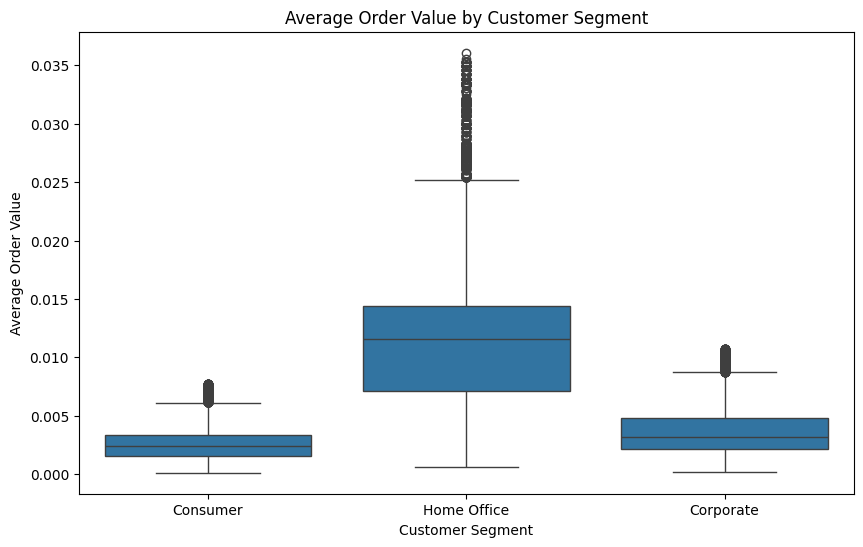

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Customer Segment', y='Average_Order_Value', data=ohe_data)
plt.title("Average Order Value by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Average Order Value")
plt.show()

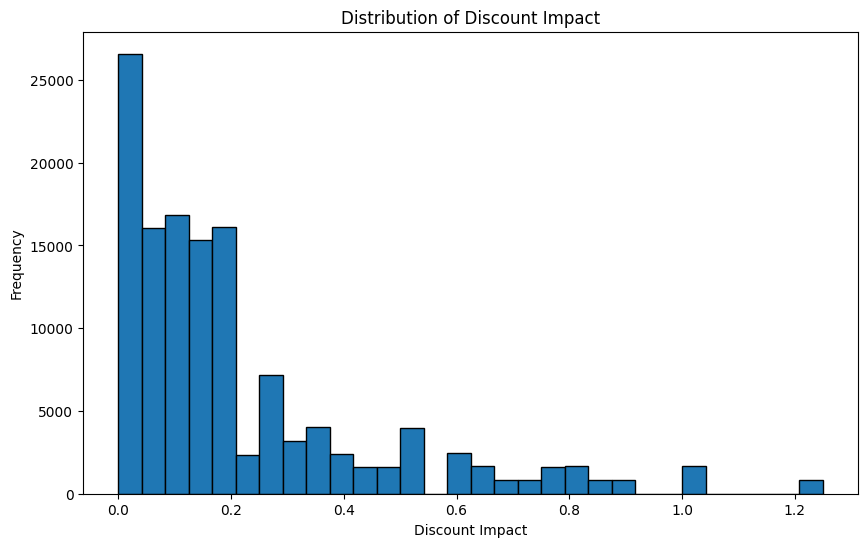

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(ohe_data['Discount_Impact'], bins=30, edgecolor='black')
plt.title("Distribution of Discount Impact")
plt.xlabel("Discount Impact")
plt.ylabel("Frequency")
plt.show()


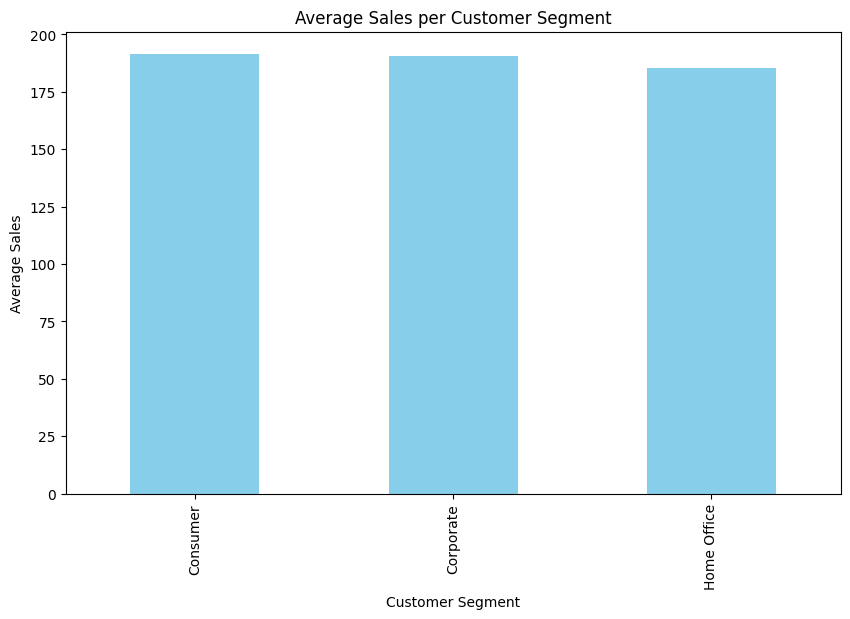

In [31]:
avg_sales_segment = ohe_data.groupby('Customer Segment')['Avg_Sales_Segment'].mean()
plt.figure(figsize=(10, 6))
avg_sales_segment.plot(kind='bar', color='skyblue')
plt.title("Average Sales per Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Average Sales")
plt.show()


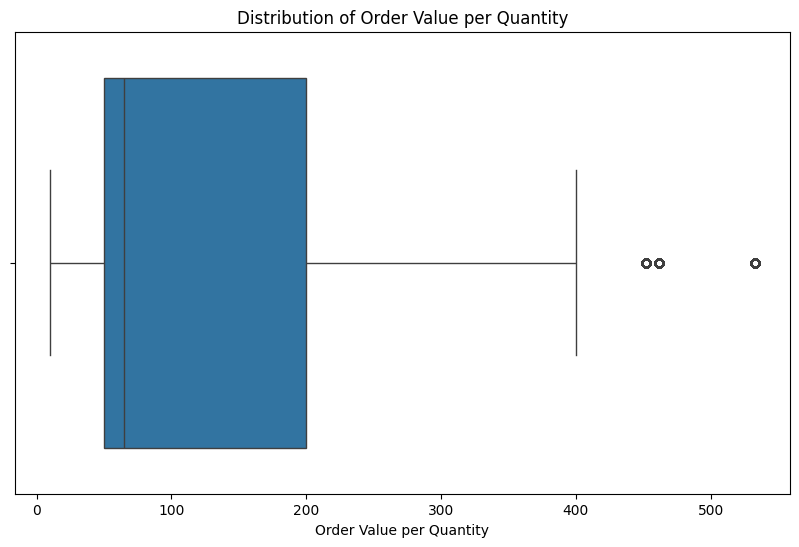

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=ohe_data['Order_Value_per_Quantity'])
plt.title("Distribution of Order Value per Quantity")
plt.xlabel("Order Value per Quantity")
plt.show()

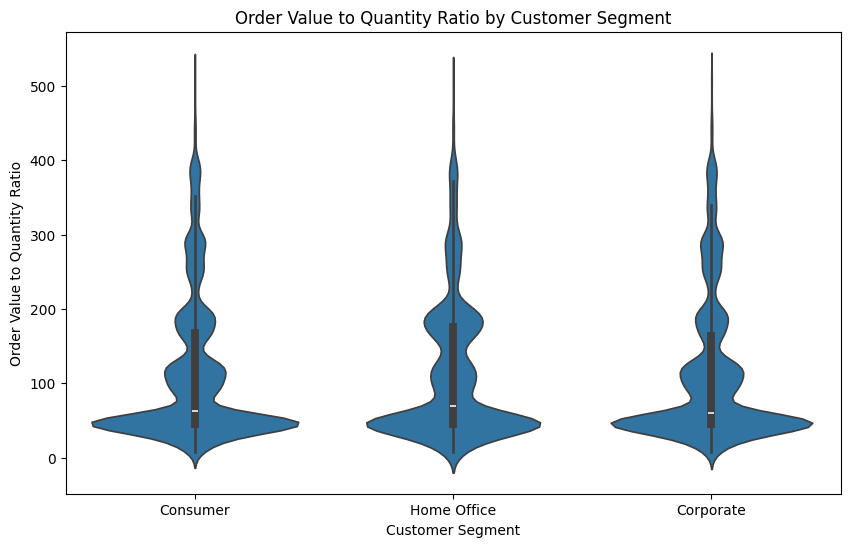

In [33]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Customer Segment', y='Order_Value_to_Quantity_Ratio', data=ohe_data)
plt.title("Order Value to Quantity Ratio by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Order Value to Quantity Ratio")
plt.show()

In [22]:
# Create binary target variable for late delivery (1 = late, 0 = on-time)
ohe_data['late_delivery'] = np.where(ohe_data['Days for shipping (real)'] > ohe_data['Days for shipment (scheduled)'], 1, 0)

# Select relevant features
features = [
    'Days for shipment (scheduled)',
    'Benefit per order',
    'Sales per customer',
    'Order Item Discount',
    'Order Item Profit Ratio',
    'Order Item Quantity',
    'Sales',
    'Order Item Total',
    'Order Profit Per Order',

    'Average_Order_Value',            # Engineered feature
    'Discount_Impact',                # Engineered feature
    'Avg_Sales_Segment',              # Engineered feature
    'Order_Value_per_Quantity',       # Engineered feature
    'Order_Value_to_Quantity_Ratio',  # Engineered feature
]

X = ohe_data[features]
y = ohe_data['late_delivery']

In [23]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Create and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Overall Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.60      0.59     10899
           1       0.71      0.69      0.70     15220

    accuracy                           0.66     26119
   macro avg       0.65      0.65      0.65     26119
weighted avg       0.66      0.66      0.66     26119

Overall Accuracy: 0.6557295455415598


In [26]:
# Calculate expected claims for the testing set
expected_claims = y_pred.mean() * 100
fixed_expense = 10
profit_premium = 0.05  # Initial profit Premium (5%)

# Calculate the premium
premium = (expected_claims + fixed_expense) * (1 + profit_premium)

print(f"Expected Claims: ${expected_claims}")
print(f"Calculated Premium: ${premium}")


Expected Claims: $57.0925379991577
Calculated Premium: $70.44716489911559


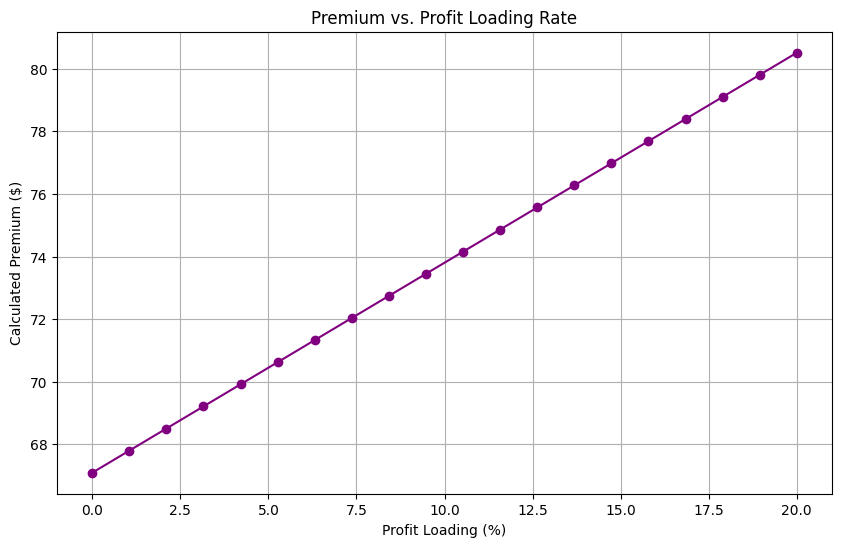

In [27]:
# 2. Line Chart for Premium vs. Profit Loading Rate
profit_rates = np.linspace(0, 0.2, 20)  # 0% to 20% profit premium
premiums = [(expected_claims + fixed_expense) * (1 + rate) for rate in profit_rates]

plt.figure(figsize=(10, 6))
plt.plot(profit_rates * 100, premiums, marker='o', color='purple')
plt.title('Premium vs. Profit Loading Rate')
plt.xlabel('Profit Loading (%)')
plt.ylabel('Calculated Premium ($)')
plt.grid()
plt.show()

<ipython-input-28-0b2672b18e6b>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_data = ohe_data.groupby('month_year').apply(lambda x: pd.Series({


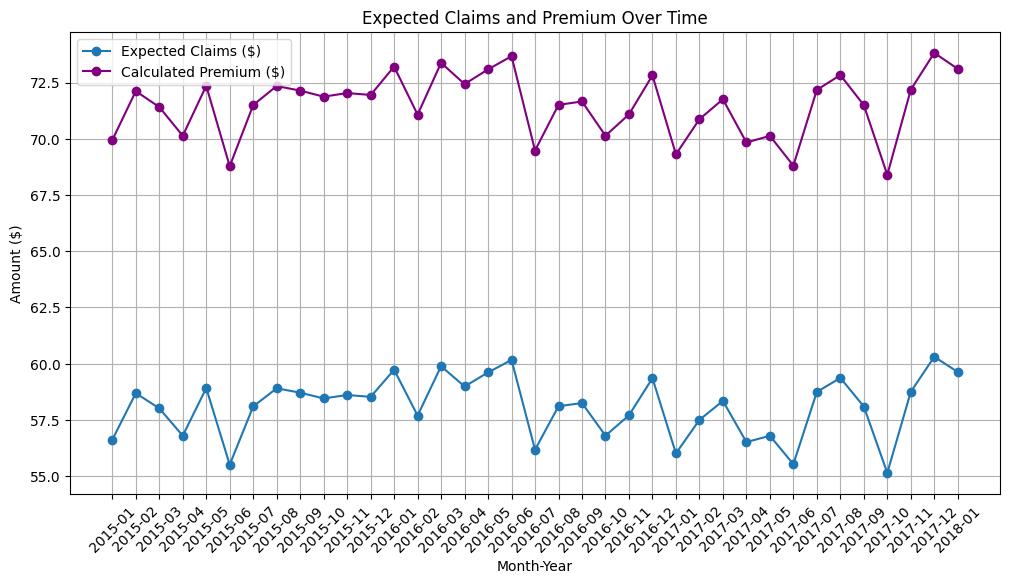

In [28]:
# Expected Claims and Premiums over Time
# Adding expected claims and premium as example values for each month
ohe_data['month_year'] = ohe_data['order date (DateOrders)'].dt.to_period("M")
monthly_data = ohe_data.groupby('month_year').apply(lambda x: pd.Series({
    'expected_claims': x['late_delivery'].mean() * 100,  # Average expected claims per month
    'calculated_premium': ((x['late_delivery'].mean() * 100 + fixed_expense) * (1 + profit_premium))
})).reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['month_year'].astype(str), monthly_data['expected_claims'], label='Expected Claims ($)', marker='o')
plt.plot(monthly_data['month_year'].astype(str), monthly_data['calculated_premium'], label='Calculated Premium ($)', marker='o', color='purple')
plt.xticks(rotation=45)
plt.title("Expected Claims and Premium Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Amount ($)")
plt.legend()
plt.grid()
plt.show()

# Expected Claims: $55.84

- This value represents the average amount the insurance company expects to pay out in claims per policyholder due to late deliveries.
- So on average, for every insurance policy, the company anticipates having to pay out about $55.84 when considering the likelihood of claims.

# Calculated Premium: $69.13

- This is the premium that the insurance company should charge each policyholder to cover the expected claims, fixed expenses, and profit loading.
- The calculation includes:
- Expected Claims ($55.84): The anticipated payout for each policyholder.
- Fixed Expense ($10): A constant cost incurred for every policy sold, regardless of whether a claim is made.
- Profit Premium (5%): An additional charge added to ensure the company makes a profit.

The calculated premium of $69.13 is higher than the expected claims of $55.84. This shows that the insurance company is pricing the policy appropriately to cover potential payouts while also making a profit